# Python developer survey 2019 - analysis


Let's start by reading the CSV with survey data, downloaded from [here](https://drive.google.com/drive/folders/1GW86M_QLFOA2KyeWeb8hzBj_RqQIXmAU?usp=sharing) thanks to [JetBrains](https://www.jetbrains.com/lp/python-developers-survey-2019/)

### Questions
The new role of **Data Scientist** is becoming very appreciated in all business. Let's have a look at where, when and maybe why!

# Aggiungere la Tabella con le bande per mostrare la differenza!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Support import clean_data
from Support import AnalyzeSingleQuestion
%matplotlib inline

# Read data
df = pd.read_csv('./python_psf_external_19.csv')


C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,66,70,73,78,98,170,181,183,200,202,206,210,225,234,235,237,244,285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Clean the data
- set multiindex column
- clean boolean data
- empty values

In [2]:
df = clean_data(df)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of questions: {len(df.columns.levels[0])}")
df.head()

Number of rows: 47308
Number of questions: 21


NaN                                                                 \
  response_id Is Python the main language you use for your current projects?   
0          10                                                Yes               
1         100                                                Yes               
2        1000                                                Yes               
3       10000                                                Yes               
4       10001                                       not answered               

  What other language(s) do you use?                                     \
                        Bash / Shell  C/C++     C# Clojure CoffeeScript   
0                               True  False  False   False        False   
1                              False  False  False   False        False   
2                              False  False  False   False        False   
3                               True  False  False   False        False   
4                              False  False  False   False        False   

                          ...  \
      Go Groovy HTML/CSS  ...   
0  False  False     True  ...   
1  False  False    False  ...   
2  False  False    False  ...   
3  False  False    False  ...   
4  False  False    False  ...   

  Which of the following best describes your job role(s)?              \
                                          Product manager QA engineer   
0                                              False            False   
1                                              False            False   
2                                              False            False   
3                                              False            False   
4                                              False            False   

                                                                \
  Systems analyst Team lead Technical support Technical writer   
0           False     False             False            False   
1           False     False             False            False   
2           False     False             False            False   
3           False     False             False            False   
4           False     False             False            False   

                                                                        NaN  \
  Which of the following industries best describes your company's business?   
0      Information Technology / Software Development                          
1         Banking / Real Estate / Mortgage Financing                          
2      Information Technology / Software Development                          
3                                                NaN                          
4                                                NaN                          

                                                         \
  Which of the following industries do you develop for?   
0      Information Technology / Software Development      
1                                                NaN      
2      Information Technology / Software Development      
3                                                NaN      
4                                                NaN      

                                                                  
  Could you tell us your age range? What country do you live in?  
0                             30–39                       Canada  
1                             30–39                United States  
2                             21–29                United States  
3                               NaN                          NaN  
4                               NaN                          NaN  

[5 rows x 290 columns]

## 1. Data scientist

How people answered to the question: `Do you consider yourself as a Data-Scientist?` <br>
The first result is that a lot of people didn't answer to this question, so we'll also need to consider those as a category; we'll instead exclude the "Other - Write in" because we don't have their notes, and they are a minority

I will study a popolution of 46217 people:
- 11522 people said: Yes (24.93 %)
- 6103 people said: No (13.21 %)
- 28592 people didn't answered (61.86 %)


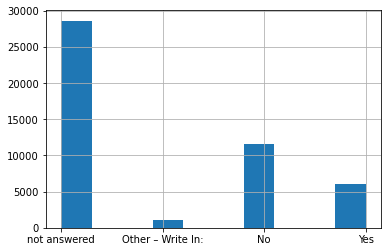

In [3]:
df[(np.nan, 'Do you consider yourself as a Data-Scientist?')].hist()

df_ds = df.loc[df[(np.nan, 'Do you consider yourself as a Data-Scientist?')] != 'Other – Write In:']
number_total = df_ds.shape[0]
number_no = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='Yes').sum()
number_yes = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='No').sum()
number_notans = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='not answered').sum()
print(f"I will study a popolution of {number_total} people:")
print(f"- {number_yes} people said: Yes ({round(100*number_yes/number_total,2)} %)")
print(f"- {number_no} people said: No ({round(100*number_no/number_total,2)} %)")
print(f"- {number_notans} people didn't answered ({round(100*number_notans/number_total,2)} %)")

# possible_answer = list(set(df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]))

### 1.1 Data scientist & programming languages
For people who consider themself as data scientist, python is the first programming language for more than the 90%; but also for other people that's high (those are python survey data!)

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, Is Python the main language you use for your current projects?)",,,
"No, I don’t use Python for my current projects",NaN,NaN,11.12
"No, I use Python as a secondary language",17.62,9.14,16.15
Yes,82.38,90.86,72.73


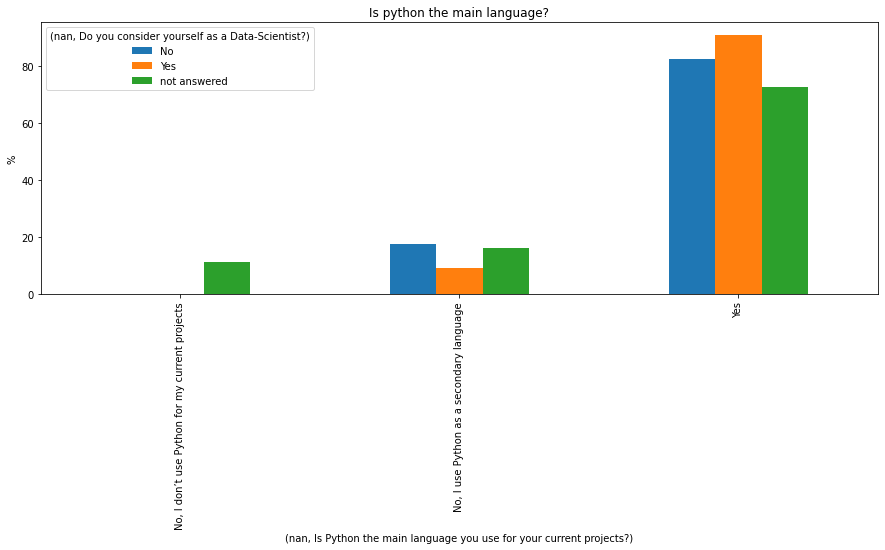

In [4]:
LangAnalyze = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'Is Python the main language you use for your current projects?'))
ds_stat = LangAnalyze.calcHist(drop_answer=['not answered'])
LangAnalyze.plotBar( title='Is python the main language?')
ds_stat

And for others programming languages?

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
What other language(s) do you use?,,,
Bash / Shell,14.44,12.63,11.19
C/C++,10.03,10.69,9.92
C#,3.81,3.56,4.23
Clojure,0.31,0.33,0.39
CoffeeScript,0.21,0.27,0.40
Go,3.56,2.23,3.21
Groovy,0.68,0.51,0.74
HTML/CSS,13.40,11.73,13.30
Java,7.03,7.63,7.73


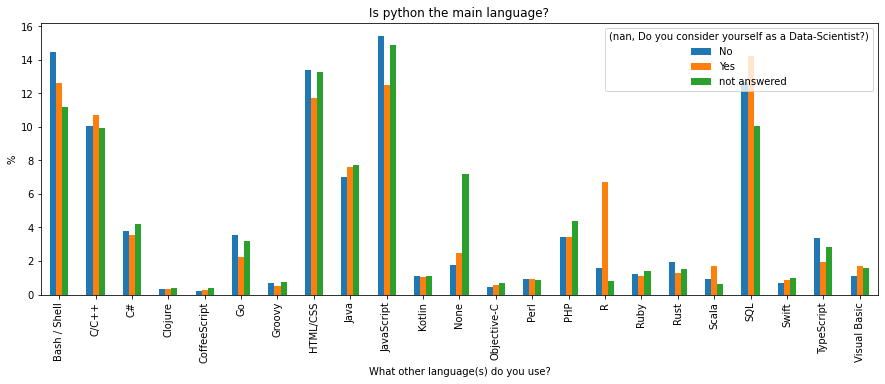

In [5]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  ('What other language(s) do you use?'))
ds_stat = classe.calcHistMulti()
classe.plotBar(title='Is python the main language?')
ds_stat.transpose()

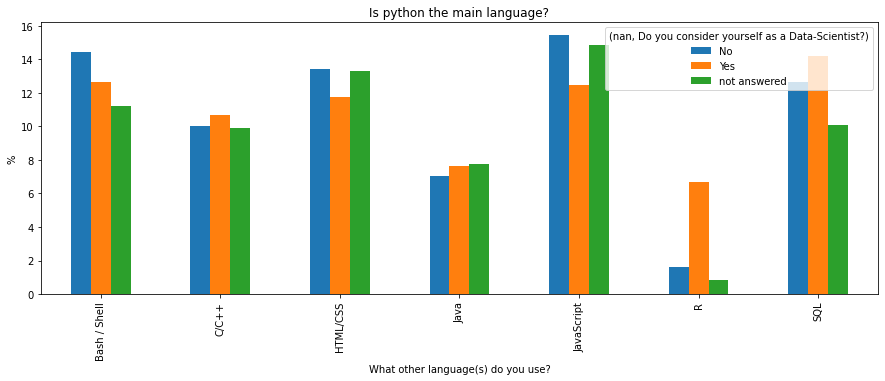

In [6]:
classe.plotBar(title='Is python the main language?', limit={'name':'Yes', 'value':4})

The programmin language that data scientist know better than other coder are: ['C/C++' 'Perl' 'R' 'Scala' 'SQL' 'Visual Basic']


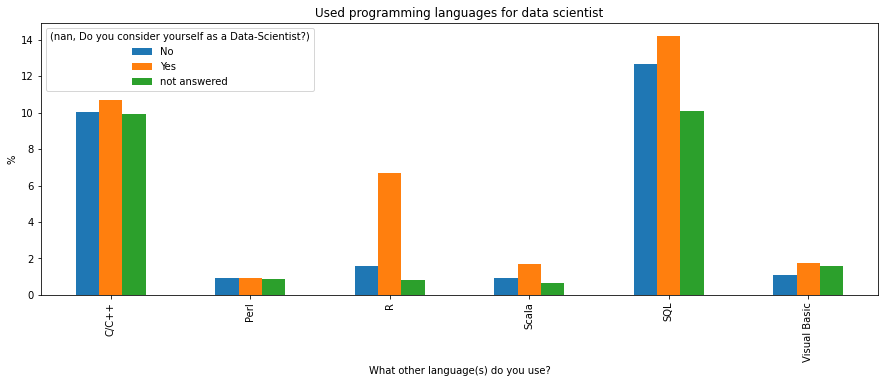

In [7]:
# best
best = (ds_stat == ds_stat.max()).loc['Yes']
ax = ds_stat[best[best].index.values].transpose().plot.bar(figsize=(15,5), title='Used programming languages for data scientist')
ax.set_ylabel("%")

print(f"The programmin language that data scientist know better than other coder are: {best[best].index.values}")

I've got a last doubt: Data Scientist who don't use python as first, what are they using?

"(nan, 'Is Python the main language you use for your current projects?')","No, I use Python as a secondary language",Yes,delta
What other language(s) do you use?,,,
Bash / Shell,7.760000,13.160000,-5.400000
C/C++,11.720000,10.570000,1.150000
C#,5.400000,3.360000,2.040000
Clojure,0.320000,0.330000,-0.010000
CoffeeScript,0.320000,0.260000,0.060000
Go,2.570000,2.190000,0.380000
Groovy,0.590000,0.510000,0.080000
HTML/CSS,9.630000,11.960000,-2.330000
Java,10.750000,7.290000,3.460000


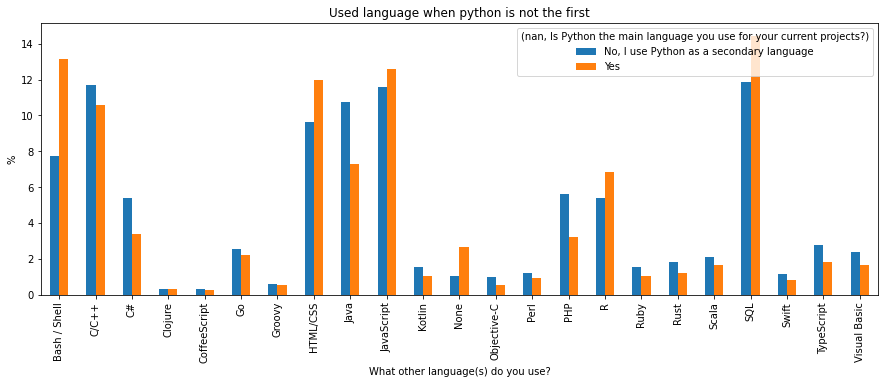

In [8]:
df_ds_reduced = df_ds.loc[df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='Yes']
classe = AnalyzeSingleQuestion(df_ds_reduced,
                               (np.nan, 'Is Python the main language you use for your current projects?'),
                                  ('What other language(s) do you use?'))
ds_stat = classe.calcHistMulti(perc=True)
classe.plotBar(title='Used language when python is not the first')
ds_stat.loc['delta'] = ds_stat.loc['No, I use Python as a secondary language'] - ds_stat.loc['Yes']
ds_stat.transpose().style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

### 1.3 Data scientist & age
How many years of experience do you need?

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How long have you been programming in Python?)",,,
Less than 1 year,14.59,15.19,30.52
1–2 years,21.85,24.66,22.72
3–5 years,31.18,36.08,24.41
6–10 years,20.01,16.30,13.53
11+ years,12.37,7.77,8.82


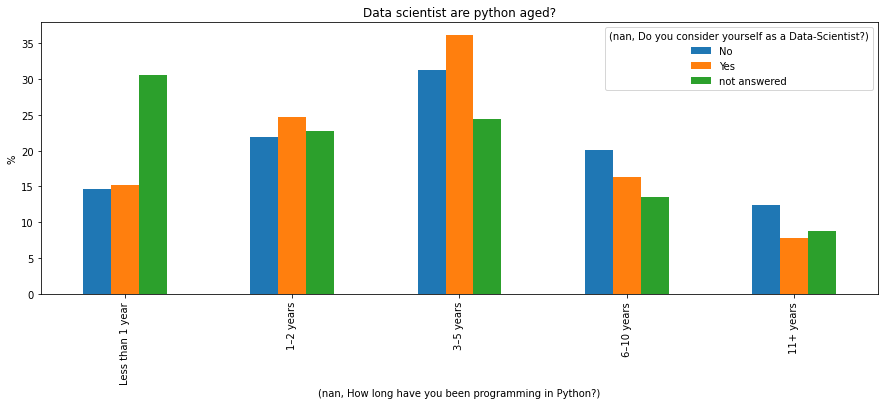

In [9]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'How long have you been programming in Python?'))
ds_stat = classe.calcHist(ordered_row=['Less than 1 year', '1–2 years','3–5 years','6–10 years','11+ years'])
classe.plotBar(title='Data scientist are python aged?')
ds_stat

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How many years of professional coding experience do you have?)",,,
Less than 1 year,24.09,23.45,36.63
1–2 years,18.83,25.38,18.44
3–5 years,20.56,24.81,17.94
6–10 years,15.63,12.81,11.89
11+ years,20.88,13.55,15.10


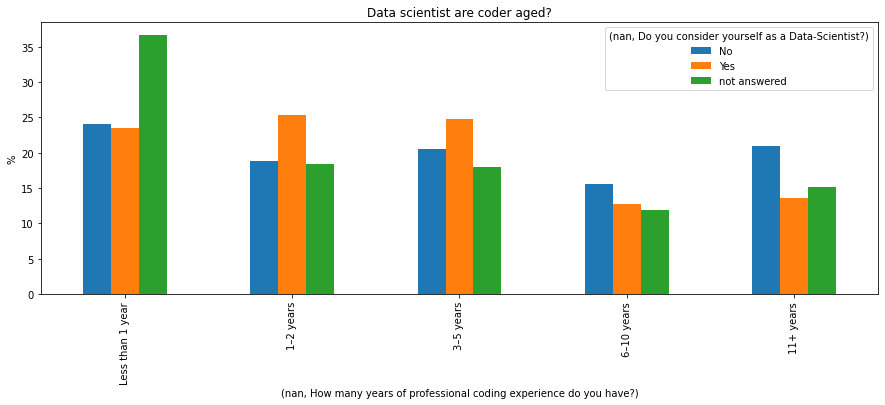

In [10]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'How many years of professional coding experience do you have?'))
ds_stat = classe.calcHist(ordered_row=['Less than 1 year', '1–2 years','3–5 years','6–10 years','11+ years'])
classe.plotBar(title='Data scientist are coder aged?')
ds_stat

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, Could you tell us your age range?)",,,
18–20,6.85,6.03,10.69
21–29,40.23,48.91,39.56
30–39,33.00,29.80,30.65
40–49,13.23,9.77,11.38
50–59,5.03,3.54,4.78
60 or older,1.66,1.95,2.94


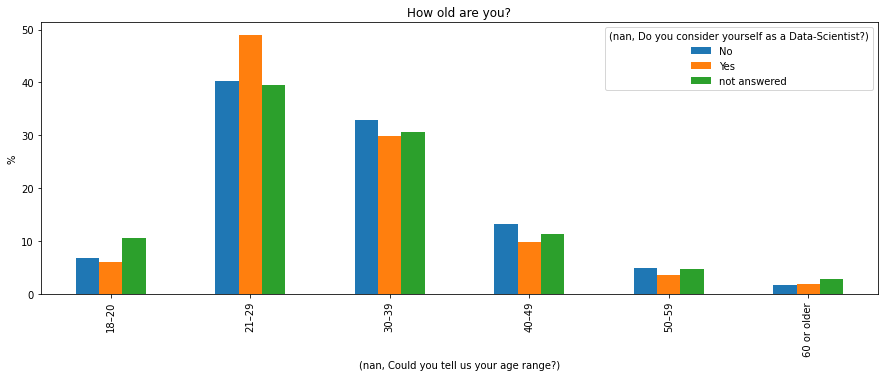

In [11]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'Could you tell us your age range?'))
ds_stat = classe.calcHist()
classe.plotBar(title='How old are you?')
ds_stat

**Data scientist are coder with a lot of experience?**
It seems not! You can be a data scientist also with some years pf experience, bot in python or other programming languages

### 1.4 Data scientist & Company
For which purpose is python used the most by data scientist?

"(nan, 'Do you consider yourself as a Data-Scientist?')",No,Yes,not answered,delta
"(nan, 'What do you use Python for the most?')",,,,
Computer graphics,0.930000,0.840000,1.510000,-0.090000
Data analysis,17.570000,35.670000,nan,18.100000
Desktop development,3.950000,1.880000,6.530000,-2.070000
DevOps / System administration / Writing automation scripts,11.280000,3.580000,14.070000,-7.700000
Educational purposes,6.610000,4.840000,6.740000,-1.770000
Embedded development,1.350000,0.720000,2.050000,-0.630000
Game development,0.680000,0.650000,2.050000,-0.030000
Machine learning,9.190000,32.080000,0.010000,22.890000
Mobile development,0.340000,0.460000,1.110000,0.120000


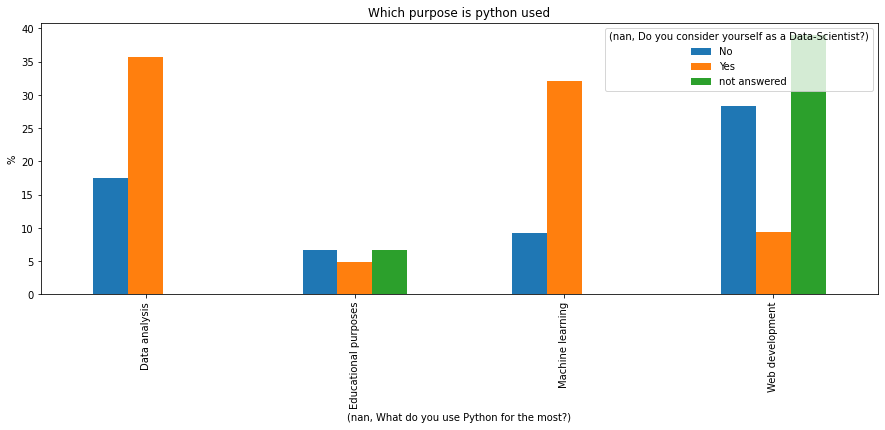

In [24]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'What do you use Python for the most?'))
ds_stat = classe.calcHist()
classe.plotBar(title='Which purpose is python used', limit={'name': 'Yes', 'value': 4})

ds_stat['delta'] = ds_stat['Yes'] - ds_stat['No']
ds_stat.style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

In [27]:
ds_stat2

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered,delta
"(nan, What do you use Python for the most?)",,,,
Data analysis,17.57,35.67,NaN,18.10
Educational purposes,6.61,4.84,6.74,-1.77
Machine learning,9.19,32.08,0.01,22.89
Web development,28.38,9.38,38.95,-19.00
Other,38.24,18.05,54.29,-20.19


C:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered,delta
"(nan, What do you use Python for the most?)",,,,
Data analysis,17.57,35.67,NaN,18.10
Educational purposes,6.61,4.84,6.74,-1.77
Machine learning,9.19,32.08,0.01,22.89
Web development,28.38,9.38,38.95,-19.00
Other,38.24,18.05,54.29,-20.19


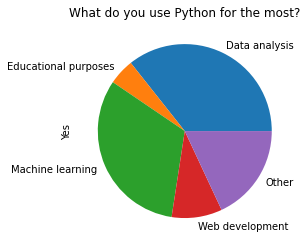

In [30]:
ds_stat2 = ds_stat.loc[ds_stat['Yes']>4]
ds_stat2.loc['Other'] = ds_stat.loc[ds_stat['Yes']<=4].sum()
ds_stat2['Yes'].plot.pie(title='What do you use Python for the most?')
ds_stat2


"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, What is your employment status?)",,,
Freelancer <em>(a person pursuing a profession without a long-term commitment to any one employer)</em>,4.75,4.56,6.07
Fully employed by a company / organization,68.90,65.48,61.94
Other – Write In:,1.22,1.27,1.90
Partially employed by a company / organization,3.05,4.39,3.43
Retired,0.65,0.56,1.57
"Self-employed <em>(a person earning income directly from one's own business, trade, or profession)</em>",5.60,5.34,6.52
Student,9.92,9.36,13.20
Working student,5.91,9.04,5.37


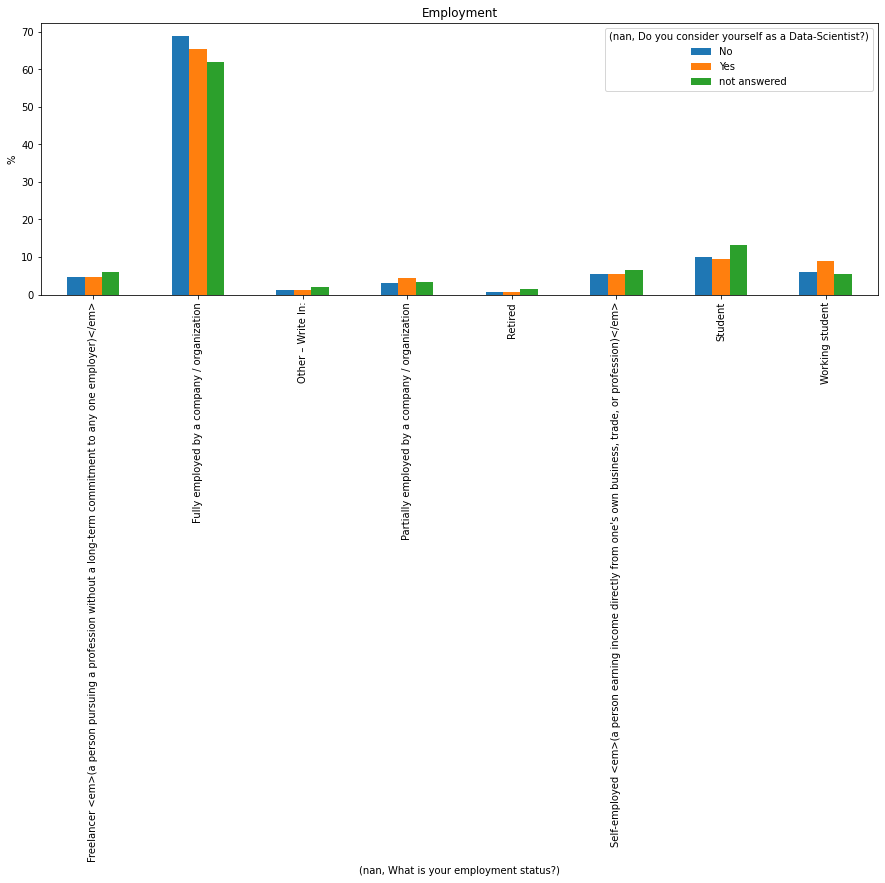

In [13]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'What is your employment status?'))
ds_stat = classe.calcHist()
classe.plotBar(title='Employment')
ds_stat

"(nan, 'Do you consider yourself as a Data-Scientist?')",No,Yes,not answered,delta
"(nan, ""Which of the following industries best describes your company's business?"")",,,,
Accounting / Finance / Insurance,5.170000,5.890000,5.000000,0.720000
Business / Strategic Management,1.300000,2.330000,1.470000,1.030000
Education / Training,5.780000,6.870000,5.520000,1.090000
Medicine / Health,3.830000,5.200000,3.330000,1.370000
Science,6.560000,11.990000,2.090000,5.430000


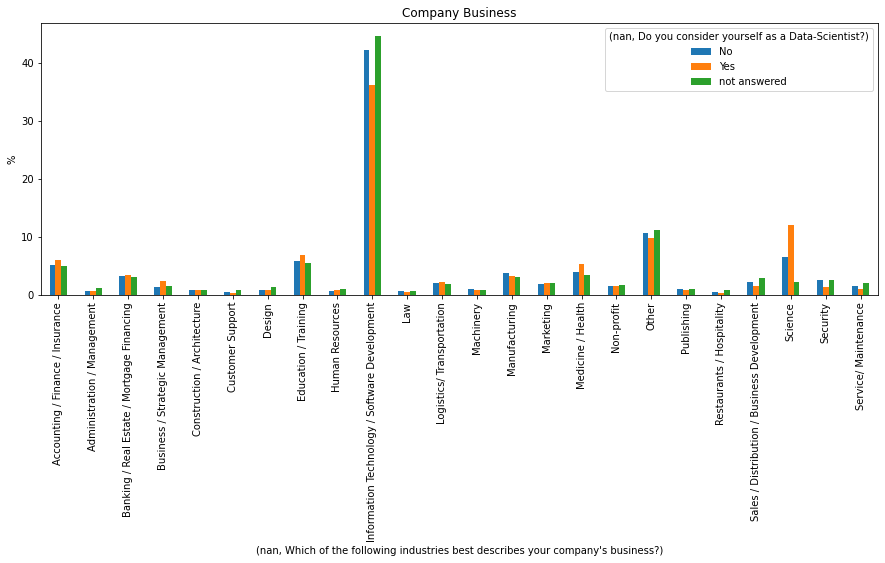

In [31]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, "Which of the following industries best describes your company's business?"))
ds_stat = classe.calcHist()
classe.plotBar(title='Company Business')
ds_stat['delta'] = ds_stat['Yes'] - ds_stat['No']
ds_stat.loc[ds_stat['delta']>0.5].style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

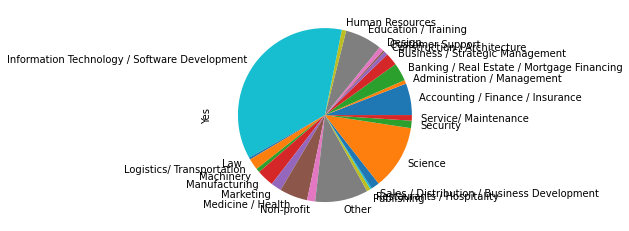

In [15]:
ds_stat['Yes'].plot.pie()

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, Which of the following industries do you develop for?)",,,
Accounting / Finance / Insurance,4.02,4.45,4.11
Administration / Management,1.35,0.85,2.36
Banking / Real Estate / Mortgage Financing,3.53,4.30,3.25
Business / Strategic Management,2.55,3.88,2.43
Construction / Architecture,0.89,0.56,0.79
Customer Support,1.14,0.78,0.46
Design,0.43,0.35,0.64
Education / Training,1.81,1.91,2.21
Human Resources,1.01,0.99,0.71


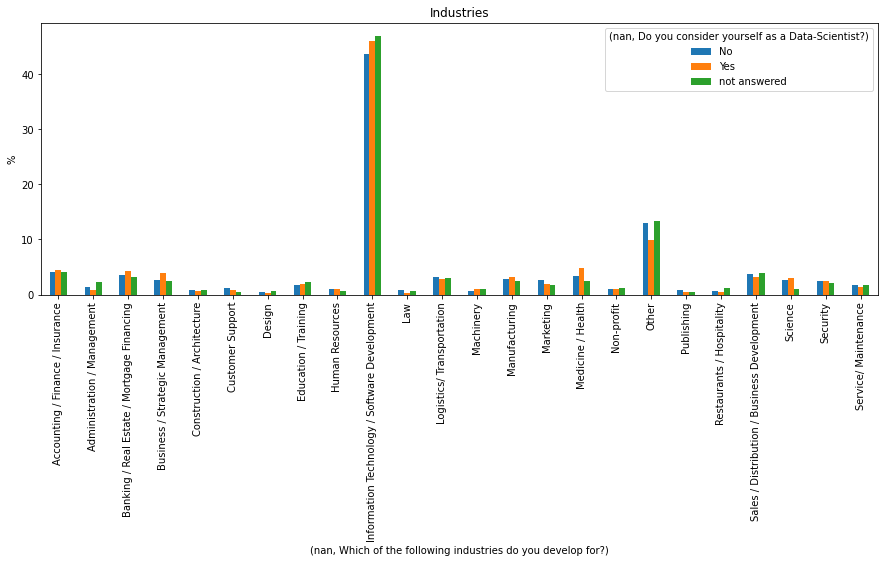

In [16]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, "Which of the following industries do you develop for?"))
ds_stat = classe.calcHist()
classe.plotBar(title='Industries')
ds_stat

### 1.5 Data Scientist & Development

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, What is the main editor you use for your current Python development?)",,,
Aptana,0.09,0.22,0.26
Atom,3.29,3.11,3.46
Eclipse + Pydev,1.18,0.79,1.45
Emacs,3.70,2.69,3.03
Gedit,0.34,0.22,0.38
IDLE,1.60,2.24,2.38
IntelliJ IDEA,1.99,1.44,2.29
Jupyter Notebook,3.04,13.47,0.70
JupyterLab,0.95,4.09,0.11


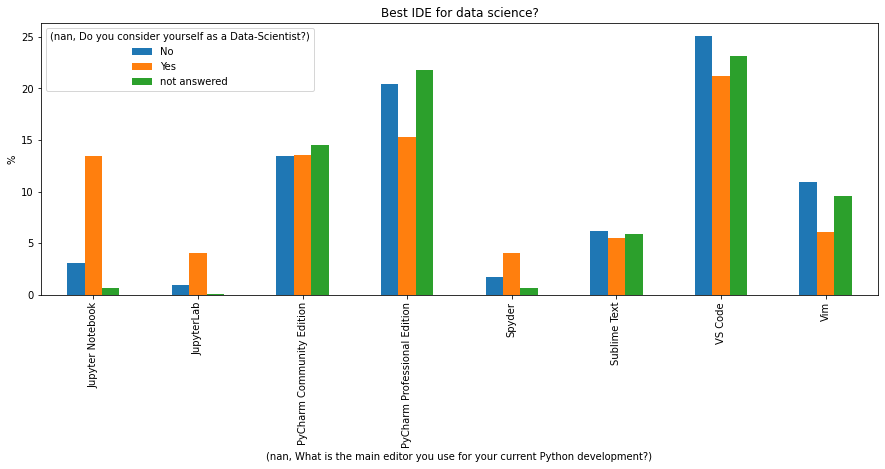

In [17]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  (np.nan, 'What is the main editor you use for your current Python development?'))
ds_stat = classe.calcHist()
classe.plotBar(title='Best IDE for data science?', limit={'name': 'Yes', 'value': 4})
ds_stat

Data Scientist mainly use Anaconda: if you don't know it, have a look! [Anaconda](https://www.anaconda.com/products/individual)

"Do you use any of the following tools to isolate Python environments, if any?",Conda,Docker,None,Pipenv,Poetry,Vagrant / virtual machines,Virtualenv
"(nan, Do you consider yourself as a Data-Scientist?)",,,,,,,
No,13.20,21.42,9.97,13.15,2.83,3.90,35.54
Yes,26.99,18.90,8.41,11.19,2.03,3.21,29.27
not answered,4.30,20.26,18.59,13.14,3.35,4.17,36.19


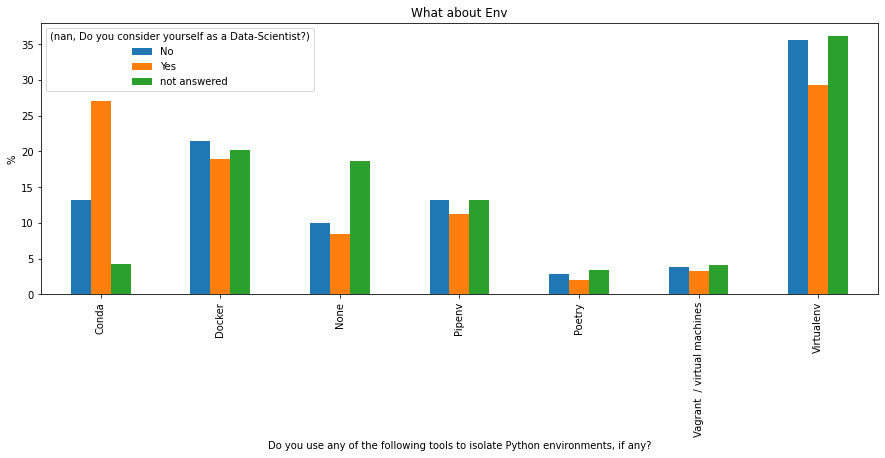

In [18]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'Do you use any of the following tools to isolate Python environments, if any?')
ds_stat = classe.calcHistMulti()
classe.plotBar(title='What about Env')
ds_stat

Pandas and Numpy and Matplotlib are considered "standard" for everybody.
You should focus then also on ML library like Keras, Tensorfow, SKlearn and Pytorch, but probably is seaborn the one you are forgetting

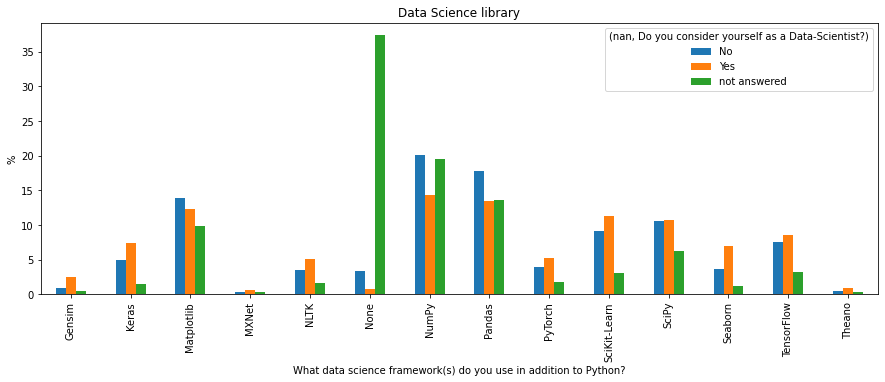

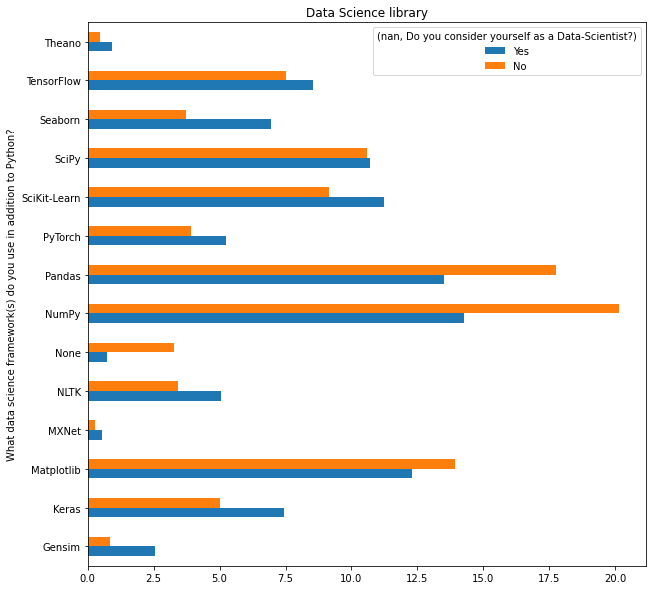

In [36]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'What data science framework(s) do you use in addition to Python?')
ds_stat = classe.calcHistMulti()
classe.plotBar(title='Data Science library')
ds_stat.loc['delta'] = ds_stat.loc['Yes'] - ds_stat.loc['No']
ds_stat.transpose().style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

"(nan, 'Do you consider yourself as a Data-Scientist?')",No,Yes,not answered,delta
Which of the following frameworks / libraries do you use in addition to Python?,,,,
aiohttp,5.850000,3.740000,6.400000,-2.110000
Asyncio,10.030000,7.430000,9.560000,-2.600000
Kivy,1.980000,2.640000,2.210000,0.660000
None,5.890000,7.020000,10.240000,1.130000
Pillow,13.850000,15.000000,12.970000,1.150000
Pygame,4.080000,4.280000,4.060000,0.200000
PyGTK,1.450000,1.780000,1.730000,0.330000
PyQT,6.890000,8.040000,5.620000,1.150000
Requests,25.330000,21.590000,25.590000,-3.740000


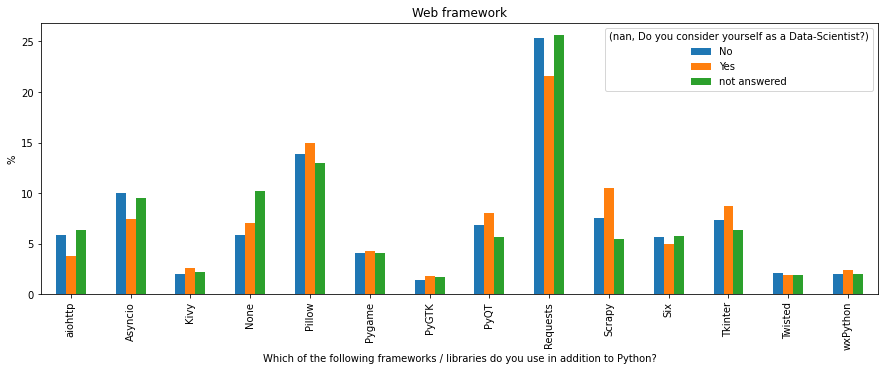

In [20]:
classe = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'Which of the following frameworks / libraries do you use in addition to Python?')
ds_stat = classe.calcHistMulti()
classe.plotBar(title='Web framework')
ds_stat.loc['delta'] = ds_stat.loc['Yes'] - ds_stat.loc['No']
ds_stat.transpose().style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

For web framework instead, there is a little prevalence in Visual library, like PyQT and Tkinter, and also in web-crawler like Scrapy and Pillow for images


### 1.6 Data Scientist & Deploy
The favourite cloud platform for data scientist are AWS, followed by Google Cloud platform and Microsoft Azure

Text(0.5, 0, '%')

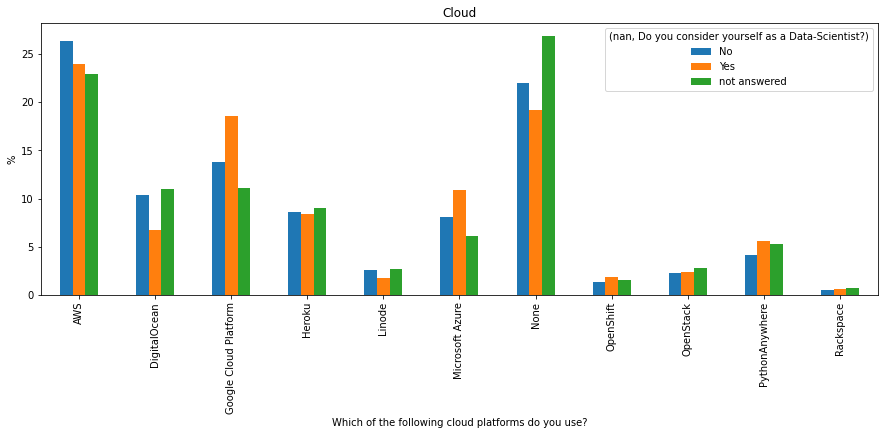

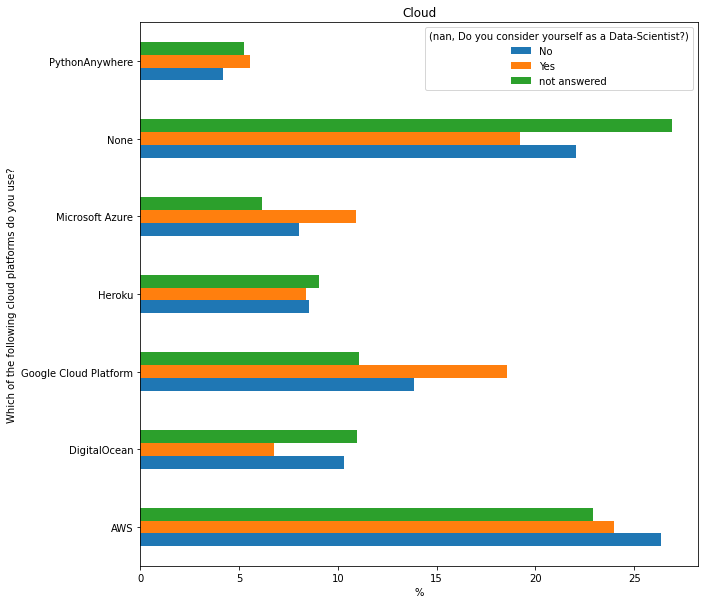

In [41]:
env = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'Which of the following cloud platforms do you use?')
ds_stat = env.calcHistMulti()
env.plotBar(title='Cloud')
ds_stat

ax = ds_stat.transpose().loc[ds_stat.transpose()['Yes']>4].plot.barh(title='Cloud', figsize=(10,10))
ax.set_xlabel('%')

### 1.7 Data Scientist & Data
There are a lot of Databases used, some more, some less.
But if you are a data Scientist, you probably need to learn a Big Data tool

"Which database(s) do you regularly use, if any?",Amazon Redshift,Cassandra,Couchbase,DB2,h2,HBase,MongoDB,MS SQL Server,MySQL,Neo4j,None,Oracle Database,PostgreSQL,Redis,SQLite
"(nan, Do you consider yourself as a Data-Scientist?)",,,,,,,,,,,,,,,
No,1.43,1.04,0.46,0.53,0.30,0.50,9.65,4.89,18.00,1.03,6.47,2.91,23.02,10.42,19.35
Yes,2.38,1.67,0.59,1.28,0.44,1.34,11.49,6.81,18.95,1.97,7.11,4.03,18.40,6.32,17.21
not answered,0.74,0.86,0.31,0.50,0.39,0.28,7.96,3.46,19.45,0.54,8.79,2.43,25.31,10.63,18.34


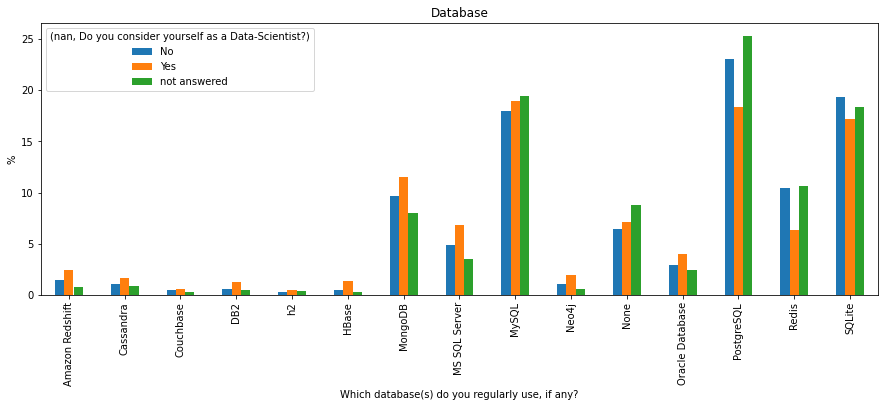

In [22]:
env = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'Which database(s) do you regularly use, if any?')
ds_stat = env.calcHistMulti()
env.plotBar(title='Database')
ds_stat

"Which of the following Big Data tool(s) do you use, if any?",Apache Beam,Apache Flink,Apache Hadoop/MapReduce,Apache Hive,Apache Kafka,Apache Samza,Apache Spark,Apache Tez,ClickHouse,Dask,None
"(nan, Do you consider yourself as a Data-Scientist?)",,,,,,,,,,,
No,0.98,0.84,5.70,3.32,8.86,0.24,10.45,0.40,0.98,3.64,64.59
Yes,2.06,1.75,10.09,6.82,8.77,0.86,19.25,1.25,1.39,8.98,38.79
not answered,0.79,0.73,1.86,1.28,5.03,0.51,3.12,0.48,1.45,0.84,83.92


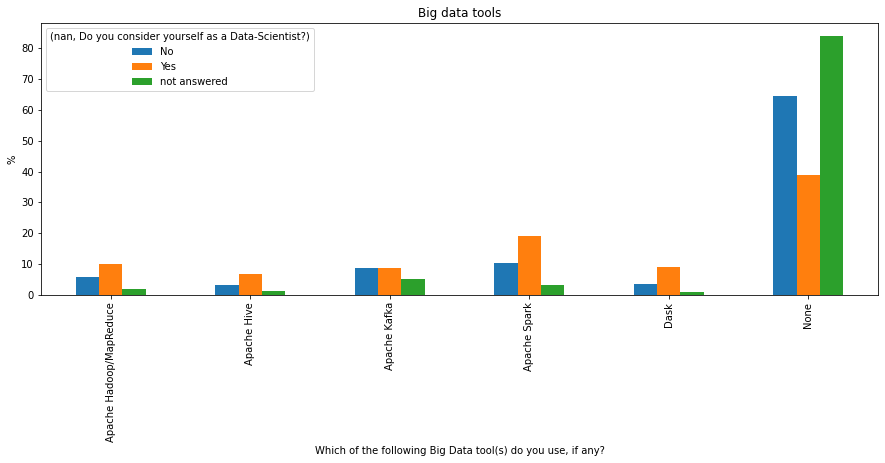

In [23]:
env = AnalyzeSingleQuestion(df_ds, (np.nan, 'Do you consider yourself as a Data-Scientist?'),
                                  'Which of the following Big Data tool(s) do you use, if any?')
ds_stat = env.calcHistMulti()
env.plotBar(title='Big data tools', limit={'name':'Yes', 'value':5})
ds_stat